# Single qubit circuit, state visualization

This notebook consists of some starter code that will initialize a single qubit circuit, draw the circuit diagram, and then plot the state of the single-qubit system using the Bloch Sphere

Gates to try out in conjunction with the Bloch Sphere for visualization
* Hadamard (H) gate -- create a circuit with one gate, the H gate, then vis with Bloch Sphere
* X gate -- create a circuit with one gate, the X gate, then vis with the Bloch Sphere

In [2]:
# imports
import qiskit
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
import numpy as np
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit import transpile
from qiskit_ibm_runtime.fake_provider import FakeTorino, FakeMarrakesh
from qiskit_ibm_runtime import SamplerV2

# show qiskit version
print(f"Qiskit version: {qiskit.__version__}")

Qiskit version: 2.2.1


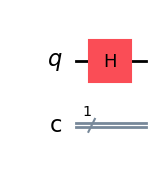

In [43]:
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.draw('mpl')

<IPython.core.display.Latex object>

Statevector as a matrix:
[[0.70710678+0.j]
 [0.70710678+0.j]]


None

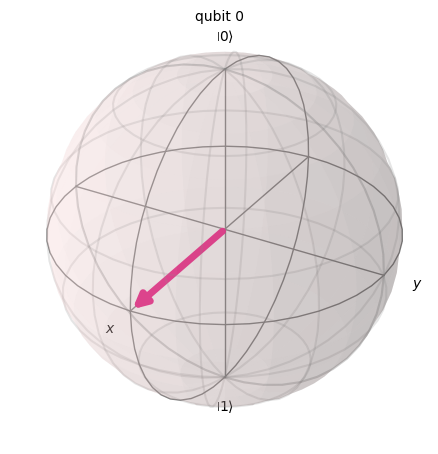

In [44]:
# 3. Get State and display
state = Statevector.from_instruction(qc)

# LaTeX outupt
display(state.draw(output='latex'))

matrix_form = np.array(state).reshape(-1, 1)

print("Statevector as a matrix:")
display(print(matrix_form))

# Display Bloch Sphere
plot_bloch_multivector(state)

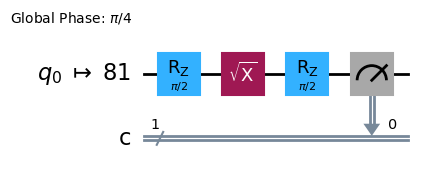

In [45]:
qc.measure(0, 0)

backend = FakeTorino()

# run the circuit
n_shots = 15000
transpiled_circuit = transpile(qc, backend)
transpiled_circuit.draw('mpl', style="iqp")

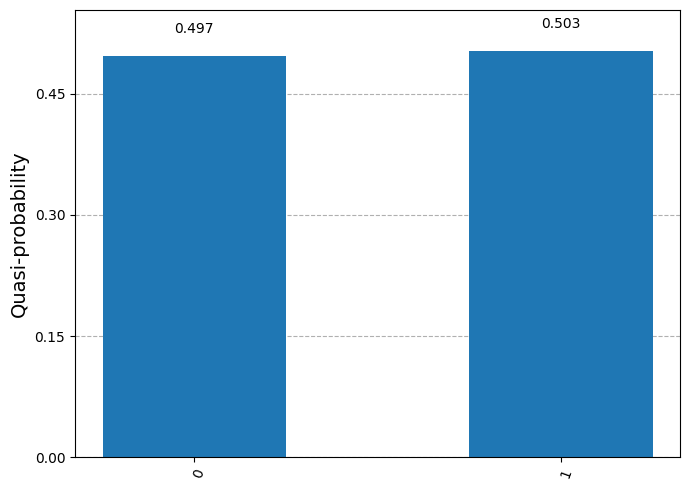

In [49]:
# Run Job for n_shots
sampler = SamplerV2(backend)
job = backend.run(transpiled_circuit, shots=n_shots)
result = job.result()

# Get counts and output distribution
counts = result.get_counts(transpiled_circuit)
plot_distribution(counts)

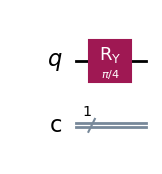

In [69]:
qc = QuantumCircuit(1, 1)
qc.ry(np.pi * 0.25, 0)
qc.draw('mpl')

<IPython.core.display.Latex object>

Statevector as a matrix:
[[0.92387953+0.j]
 [0.38268343+0.j]]


None

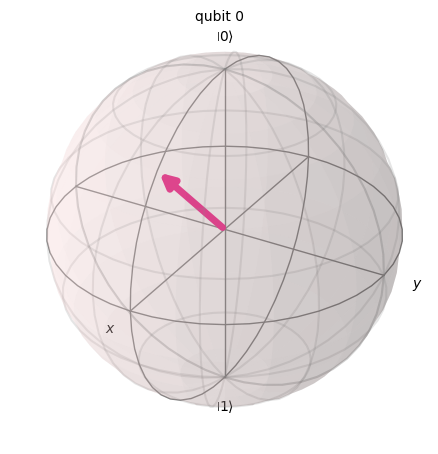

In [70]:
# 3. Get State and display
state = Statevector.from_instruction(qc)

# LaTeX outupt
display(state.draw(output='latex'))

matrix_form = np.array(state).reshape(-1, 1)

print("Statevector as a matrix:")
display(print(matrix_form))

# Display Bloch Sphere
plot_bloch_multivector(state)

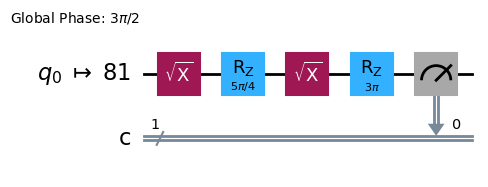

In [71]:
qc.measure(0, 0)

backend = FakeTorino()

# run the circuit
n_shots = 15000
transpiled_circuit = transpile(qc, backend)
transpiled_circuit.draw('mpl', style="iqp")

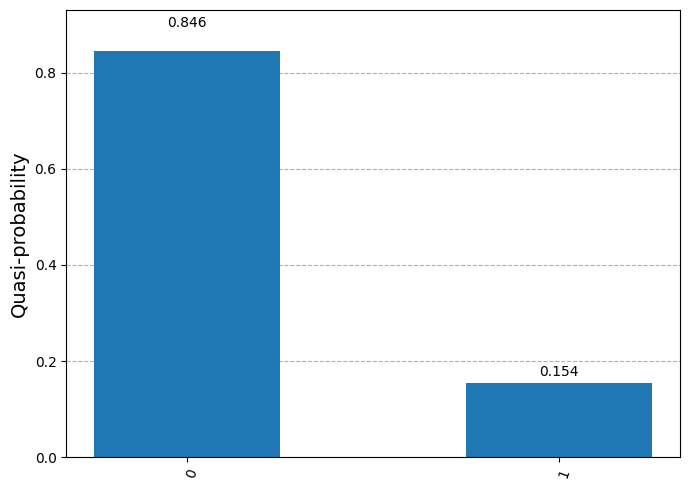

In [78]:
# Run Job for n_shots
sampler = SamplerV2(backend)
job = backend.run(transpiled_circuit, shots=n_shots)
result = job.result()

# Get counts and output distribution
counts = result.get_counts(transpiled_circuit)
plot_distribution(counts)

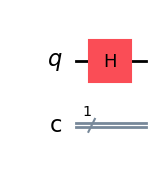

In [105]:
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.draw('mpl')

<IPython.core.display.Latex object>

Statevector as a matrix:
[[0.70710678+0.j]
 [0.70710678+0.j]]


None

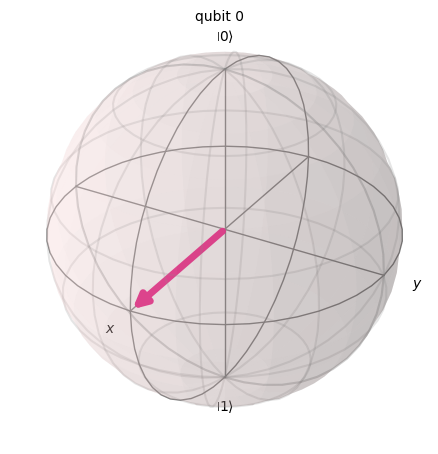

In [106]:
# 3. Get State and display
state = Statevector.from_instruction(qc)

# LaTeX outupt
display(state.draw(output='latex'))

matrix_form = np.array(state).reshape(-1, 1)

print("Statevector as a matrix:")
display(print(matrix_form))

# Display Bloch Sphere
plot_bloch_multivector(state)

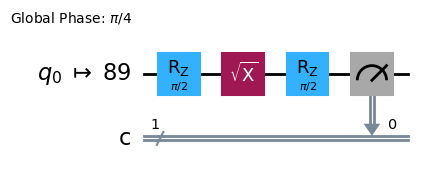

In [107]:
qc.measure(0, 0)

backend = FakeMarrakesh()

# run the circuit
n_shots = 15000
transpiled_circuit = transpile(qc, backend)
transpiled_circuit.draw('mpl', style="iqp")

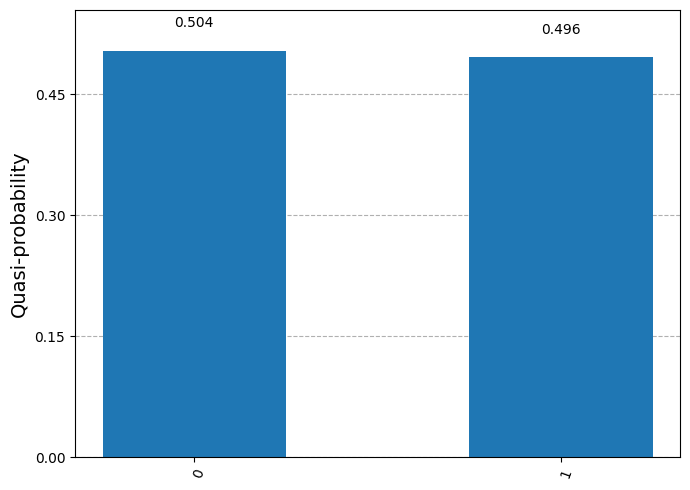

In [112]:
# Run Job for n_shots
sampler = SamplerV2(backend)
job = backend.run(transpiled_circuit, shots=n_shots)
result = job.result()

# Get counts and output distribution
counts = result.get_counts(transpiled_circuit)
plot_distribution(counts)

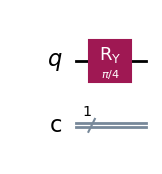

In [3]:
qc = QuantumCircuit(1, 1)
qc.ry(np.pi * 0.25, 0)
qc.draw('mpl')

<IPython.core.display.Latex object>

Statevector as a matrix:
[[0.92387953+0.j]
 [0.38268343+0.j]]


None

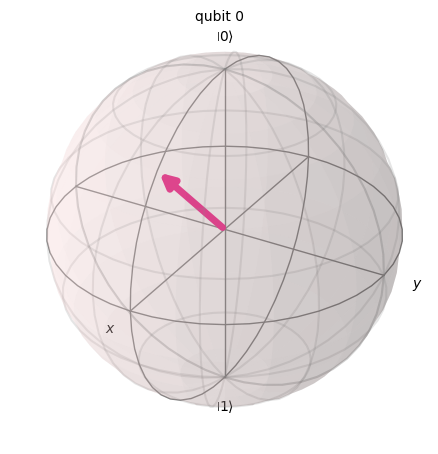

In [4]:
# 3. Get State and display
state = Statevector.from_instruction(qc)

# LaTeX outupt
display(state.draw(output='latex'))

matrix_form = np.array(state).reshape(-1, 1)

print("Statevector as a matrix:")
display(print(matrix_form))

# Display Bloch Sphere
plot_bloch_multivector(state)

In [5]:
qc.measure(0, 0)

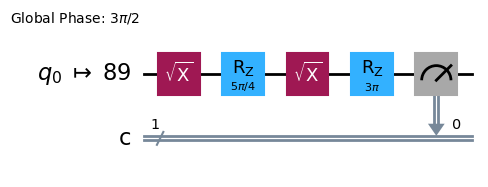

In [6]:
# setup the fake backend
backend = FakeMarrakesh()

# run the circuit
n_shots = 15000
transpiled_circuit = transpile(qc, backend)
transpiled_circuit.draw('mpl', style="iqp")

1.4210854715202004e-14
0.28666666666666174


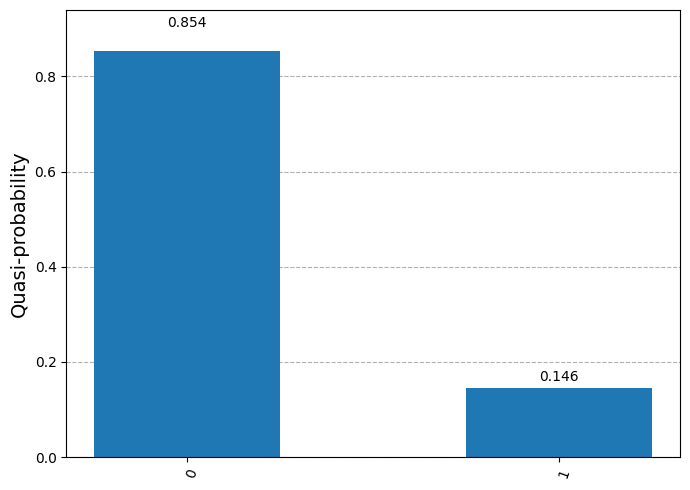

In [7]:
min = 100
max = 0

run_1_counts = {}

for i in range(5):
    # Run Job for n_shots
    sampler = SamplerV2(backend)
    job = backend.run(transpiled_circuit, shots=n_shots)
    result = job.result()
    
    # Get counts and output distribution
    counts = result.get_counts(transpiled_circuit)
    
    if(i == 0):
        run_1_counts = counts
        
    counts_0 = counts.get('0', -1)
    counts_0_percent = (counts_0 / n_shots) * 100    
    res_0 = abs(85.4 - counts_0_percent)
    
    if min > res_0: 
        min = res_0
    if max < res_0:
        max = res_0
    
print(min)
print(max)

plot_distribution(run_1_counts)
